In [37]:
# HIDDEN

from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
p = 0.1
import numpy as np

We've seen how data is represented as a sequence of values.  What if we want to do something once for each value in the sequence?  For instance, maybe we want to compute the sum of a sequence of numbers.  How can we do that?  The answer is to use iteration: in particular, we use a Python construct called a `for`-loop.  Check it out:

In [38]:
tbl = Table([[2,3,10]], ['num'])

In [39]:
tbl

num
2
3
10


In [40]:
tbl['num']

array([ 2,  3, 10])

OK, so that gives us a sequence of numbers (the sequence 5, 6, 11).

In [41]:
total = 0
for i in tbl['num']:
    total = total + i
total

15

Notice how this works.  We start out by setting `total` to hold the number 0.  Then, we go through the sequence, one by one.  For each number in the sequence, we temporarily set `i` to hold that number, and then we execute the statement `total = total + i`.  This statement replaces the previous value of `total` with `total + i`.  In other words, it adds `i` to the current running total.  Once we've gone through the entire sequence, `total` holds the sum of all of the numbers in the sequence.

In short, a `for`-loop lets you do something once for each item in a sequence.  It *iterates* through the sequence, examining each value one at a time, and does something for each.

In this case, we could have accomplished the same task without a `for`-loop: there is a `numpy` function we could have used (`np.sum`) to do this for us.  That's not unusual; it's not unusual that there might be multiple ways to accomplish the same task.  But sometimes there is no existing Python function that does exactly what we want, and that's when it is good to have tools we can use to do what we want.

## Repetition

A special case of iteration is where we want to do some simple task multiple times: say, 10 times.  You could copy-paste the code 10 times, but that gets a little tedious, and if you wanted to do it a thousand times (or a million times), forget it.  Also, copy-pasting code is usually a bad idea: what if you realize you want to change some piece of it?  Then you'll need to laboriously change each copy of it.  Boooring!

A better solution is to use a `for`-loop for this purpose.  The trick is to choose a sequence of length 10, and then iterate over the sequence: do the task once for each item in the sequence.  It doesn't really matter what we put in the sequence; any sequence will do.

However, there is a standard idiom for what to put in the sequence.  The typical solution is to create a sequence of consecutive integers, starting at 0, and iterate over it.  If we wanted to do something 1000 times, we'd create a sequence holding the values 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.  Why 9? (and not 10?)  Because that's where we need to end, if we want the list to have 10 items.  (Why not use 1, 2, .., 10?  I'm tempted to say, because computer scientists are just a tad odd.  Actually, there are good reasons for this idiom, but don't worry about it right now.)

How do we create a sequence 0, 1, .., 9?  It turns out we've already seen how to do that: use `np.arange()`.

In [42]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

So, now I'm ready to show you how to do something 10 times:

In [43]:
for i in np.arange(10):
    print('Go Bears!')

Go Bears!
Go Bears!
Go Bears!
Go Bears!
Go Bears!
Go Bears!
Go Bears!
Go Bears!
Go Bears!
Go Bears!


Strings are sequences, too:

In [44]:
for c in 'CAL':
    print('Give me a '+c)

Give me a C
Give me a A
Give me a L


In this class, you're going to use this a lot for simulation.  For instance, you might code up a way to simulate one round of some gambling game; then you can use a `for`-loop to repeat the simulation thousands of times and see how often we win.  The great thing about computers is that they're incredibly good at doing a small task repeatedly many times, so this is a perfect match for what they're good at.

## Randomized response

Next, we'll look at a technique that was designed several decades ago to help conduct surveys of sensitive subjects.  Researchers wanted to ask participants a few questions: Have you ever had an affair?  Do you secretly think you are gay?  Have you ever shoplifted?  Have you ever sung a Justin Bieber song in the shower?  They figured that some people might not respond honestly, because of the social stigma associated with answering "yes".  So, they came up with a clever way to estimate the fraction of the population who are in the "yes" camp, without violating anyone's privacy.

Here's the idea.  We'll instruct the respondent to roll a fair 6-sided die, secretly, where no one else can see it.  If the die comes up 1, 2, 3, or 4, then respondent is supposed to answer honestly.  If it comes up 5 or 6, the respondent is supposed to answer the *opposite* of what their true answer would be.  But, they shouldn't reveal what came up on their die.

Notice how clever this is.  Even if the person says "yes", that doesn't necessarily mean their true answer is "yes" -- they might very well have just rolled a 5 or 6.  So the responses to the survey don't reveal any one individual's true answer.  Yet, in aggregate, the responses give enough information that we can get a pretty good estimate of the fraction of people whose true answer is "yes".

Let's try a simulation, so we can see how this works.  We'll write some code to perform this operation.  First, a function to simulate rolling one die:

In [45]:
dicetbl = Table([[1,2,3,4,5,6]], ['roll'])
dicetbl

roll
1
2
3
4
5
6


In [46]:
def rollonedie():
    tbl = dicetbl.sample(k=1) # Make a table with one row, chosen at random from dicetbl
    roll = tbl['roll'][0]
    return roll

Now we'll use this to write a function to simulate how someone is supposed to respond to the survey.  The argument to the function is their true answer; the function returns what they're supposed to tell the interview.

In [47]:
# 1 stands for 'yes', 0 stands for 'no'
def respond(trueanswer):
    roll = rollonedie()
    if roll >= 5:
        return 1-trueanswer
    else:
        return trueanswer

We can try it.  Assume our true answer is 'no'; let's see what happens this time:

In [48]:
respond(0)

1

Of course, if you were to run it again, you might get a different result next time.

In [49]:
respond(0)

0

In [50]:
respond(0)

1

In [51]:
respond(0)

0

OK, so this lets us simulate the behavior of one participant, using randomized response.  Let's simulate what happens if we do this with 10,000 respondents.  We're going to imagine asking 10,000 people whether they've ever sung a Justin Bieber song in teh shower.  We'll imagine there are `10000 * p` people whose true answer is "yes" and `10000 * (1-p)` whose true answer is "no", so we'll use one `for`-loop to simulate the behavior each of the first `10000 * p` people, and a second `for`-loop to simulate the behavior of the remaining `10000 * (1-p)`.  We'll collect all the responses in a table, appending each response to the table as we receive it.

In [52]:
responses = Table([[]], ['response'])
for i in range(int(p*10000)):
    r = respond(1)
    responses.append([r])
for i in range(int((1-p)*10000)):
    r = respond(0)
    responses.append([r])

In [53]:
responses

response
0
1
1
0
1
1
1
1
0
1


We get a giant table with 10,000 rows, one per simulated participant.  Let's build a histogram and look at how many "yes"s we got and how many "no"s.

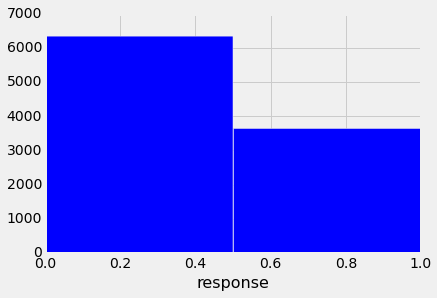

In [54]:
responses.hist(bins=2)

In [55]:
responses.where('response', 0).num_rows

6345

In [56]:
responses.where('response', 1).num_rows

3655

So we polled 10,000 people, and got back 3644 yes responses.

**Exercise for you:** Based on these results, approximately what fraction of the population has truly sung a Justin Bieber song in the shower?

Take a moment with your partner and work out the answer.

## Summing up

This method is called "randomized response".  It is one way to poll people about sensitive subjects, while still protecting their privacy.  You can see how it is a nice example of randomness at work.

It turns out that randomized response has beautiful generalizations.  For instance, your Chrome web browser uses it to anonymously report feedback to Google, in a way that won't violate your privacy.  That's all we'll say about it for this semester, but if you take an upper-division course, maybe you'll get to see some generalizations of this beautiful technique.